<img src='img/logo.png'>
<img src='img/title.png'>
<img src='img/py3k.png'>

# Table of Contents
* [Learning Objectives](#Learning-Objectives)
* [Calculate whether a point is in a polygon](#Calculate-whether-a-point-is-in-a-polygon)
	* [Rearranging the exercise steps](#Rearranging-the-exercise-steps)
	* [Refactor the function to reflect cleaner Python coding style](#Refactor-the-function-to-reflect-cleaner-Python-coding-style)
	* [Create unit tests for the `point_in_poly()` function](#Create-unit-tests-for-the-point_in_poly%28%29-function)
	* [Write a `doctring` and adequate documentation of the `point_in_poly()` function](#Write-a-doctring-and-adequate-documentation-of-the-point_in_poly%28%29-function)


# Learning Objectives

* Add unit tests to code
* Add documentation to code
* Refactor the code
* Develop library functionality with pair programming
* Practice modular code design

**The series of exercises in the Geospatial series are intended to present a realistically difficult set of development problems.  These exercises might take a half day or more for a class to work on extensively.**

# Calculate whether a point is in a polygon

This code was found at http://geospatialpython.com/2011/01/point-in-polygon.html, and uses the same algorithm found in numerous places.  It is documented concisely as:

> Determine if a point is inside a given polygon or notvPolygon is a list of (x,y) pairs. This function returns True or False.  The algorithm is called the "Ray Casting Method".

While I understand the concept of the ray casting method intuitive enough, I find this code to be difficult to read and undocumented.  I believe it is correct, but it leaves room for improvement in coding practices.

In [5]:
def point_in_poly_old(x, y, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y
        
    return inside

The basic test provided shows the API of the function, and produces a correct result in the single case.

In [6]:
## Test
polygon = [(0,10),(10,10),(10,0),(0,0)]

point_x = 5
point_y = 5

## Call the function with the points and the polygon
point_in_poly_old(point_x, point_y, polygon)

True

## Rearranging the exercise steps

Although the exercise suggested developing tests and documentation first, here we present an improved API and better structured code first.  We make a judgement that refactoring first is a good idea—but part of our testing should be checks that the old and new versions behave the same.  The function above is renamed as `point_in_poly_old()`.

## Refactor the function to reflect cleaner Python coding style

Is the API of the function as well self-documenting and reusable as you would like? If not, let's modify it.  Is the code within the function body as readable and clean as it should be? If not, let's improve it for readability and functionality.  Did you encounter any problems or edge cases when you designed unit tests? If so, document those and/or change the functionality to the behavior you think is most useful.

## Write a `doctring` and adequate documentation of the `point_in_poly()` function

A new developer encountering this code will likely take a while to figure out its logic.  A well chosen docstring and/or some inline documentation can make this easier to understand.  Please add those.

---
Several changes make for cleaner code.  We can pass in a single `point` object rather than paired x and y dimensions.  That makes it less likely we will mismatch our coordinates.  The other notable change is that the original code—copied very literally from a C-coded version—uses three nested `if` clauses, two of which compare the same value.  By using chained comparisons and a conjunction, we can make this simpler.

In [11]:
from collections import namedtuple
Point = namedtuple("Point", "x y")

def point_in_poly(point, poly):
    """Determine whether a point is inside a polygon

    A point object must have attributes .x and .y.
    A polygon is a sequence of coordinates, with the closing segment 
      from last to first coordinate being implied.
    """
    n = len(poly)
    inside = False
    # Consider each of the line segments of the polygon.  We call the beginning
    # pair (p1x, p1y) and the ending pair (p2x, p2y), and redefine them in loop
    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if min(p1y, p2y) < point.y <= max(p1y, p2y) and point.x <= max(p1x, p2x):
            if p1y != p2y:
                xints = (point.y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
            if p1x == p2x or point.x <= xints:
                inside = not inside
        p1x, p1y = p2x, p2y
    return inside

In [12]:
point_in_poly(Point(5,5), polygon)

True

## Create unit tests for the `point_in_poly()` function

Using one of the unit test frameworks we have discussed, write a set of correctness tests for the function that exercise edge cases you may think of.  Writing these tests will help us when we further refactor the code to assure consistent behavior—or to understand exactly *why* we have fixed problem behavior in the original implementation.

You may consider using visualization while you construct your unit tests.

In [13]:
poly2 = [(2,0), (0,2), (-2,0), (0,-2)]
tests = [(-2, 0), (2, 0), (1, 1), (-1, -1), (-1,-1), (1, -1), 
         (-1, 1), (0, 2), (0, -2), (.5, .5), (-1, .5), (0, 0),
         (1.5, 1.5)]

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_poly_points(poly, tests):
    closed = poly + [poly[0]]
    xs, ys = zip(*closed)
    plt.plot(xs, ys)
    plt.xlim(min(xs)-0.1, max(xs)+0.1)
    plt.ylim(min(ys)-0.1, max(ys)+0.1)
    for x, y in tests:
        plt.plot(x, y, 'ro')
    plt.show()

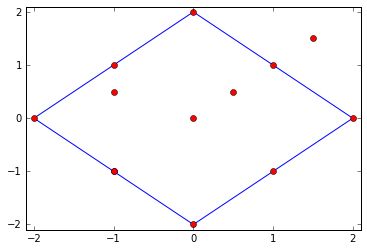

In [15]:
show_poly_points(poly2, tests)

Notice that once we consturct this visualization, we realize that we have to decide somewhat arbitrary whether a point **on** a vertex or edge counts as "inside."  Either approach seems fine, but we should document the actual behavior.

In [17]:
for x,y in tests:
    print("(%+.2f, %+.2f)\t" % (x, y), point_in_poly(Point(x, y), poly2))

(-2.00, +0.00)	 False
(+2.00, +0.00)	 True
(+1.00, +1.00)	 True
(-1.00, -1.00)	 False
(-1.00, -1.00)	 False
(+1.00, -1.00)	 True
(-1.00, +1.00)	 False
(+0.00, +2.00)	 False
(+0.00, -2.00)	 False
(+0.50, +0.50)	 True
(-1.00, +0.50)	 True
(+0.00, +0.00)	 True
(+1.50, +1.50)	 False


<img src='img/copyright.png'>